## Update content of the Atlas - generate maps based on the netcdf data
**Function**      : Plot maps in a uniform way based on the netcdf files<br>
**Author          : Team BETA**<br>
**First Built**   : 2021.07.28<br>
**Last Update     : 2021.07.28**<br>
**Library**       : os, numpy, netcdf4, matplotlib, cartopy<br>
**Description**   : In this notebook serves to extract netcdf data and generate maps for Atlas page.<br>
**Return Values   : png files**<br>
**Note**          : All the maps are generated in a uniform way.<br>

In [5]:
import os
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

### Path
Specify the path to the dataset and the place to save the outputs. <br>

In [2]:
# please specify data path
datapath = '/mnt/d/NLeSC/BETA/EUCP/Atlas'
# please specify output path
output_path = '../assets/sample_figures/test'
os.makedirs(output_path, exist_ok = True)

### Extract data
Extract weather/climate data from given netCDF files.

In [3]:
# load dataset
dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = Dataset(os.path.join(datapath,
                                                         'eur_CMIP5_pr_2041-2060_vs_1995-2014_10_JJA.nc'))
dataset_eur_tas_41_60_vs_95_14_jja_cmip6_50prec = Dataset(os.path.join(datapath,
                                                         'eur_CMIP6_tas_2041-2060_vs_1995-2014_50_JJA.nc'))
dataset_eur_pr_41_60_jja_cmip6_10prec = Dataset(os.path.join(datapath,
                                                'eur_pr_41-60_jja_cmip6_10perc_rel.nc'))
dataset_eur_tas_41_60_jja_cmip6_50prec = Dataset(os.path.join(datapath,
                                                'eur_tas_41-60_jja_cmip6_50perc.nc'))

In [4]:
# extract data
eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['pr_weighted'][:]
lat_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['lat'][:]
lon_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['lon'][:]

/home/yangliu/miniconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


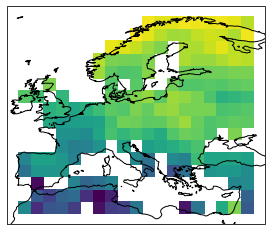

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lon_eur_pr_41_60_vs_95_14_jja_cmip5_10prec,
               lat_eur_pr_41_60_vs_95_14_jja_cmip5_10prec,
               eur_pr_41_60_vs_95_14_jja_cmip5_10prec)
ax.coastlines()
plt.show()